In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.pipeline import make_pipeline 
%pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"
%pip install Kneed
from kneed import KneeLocator



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
df=pd.read_csv("/workspaces/IT326-PROJECT/Dataset Folder/Processed_dataset.csv")
data = pd.DataFrame(df)

print(df.head())

   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0   1            6  0.679739       0.500000       0.740741  0.623984   
1   2            1  0.267974       0.411765       0.518519  0.623984   
2   3            8  0.908497       0.382353       0.529246  0.623984   
3   4            1  0.294118       0.411765       0.296296  0.177778   
4   6            5  0.470588       0.529412       0.529246  0.623984   

        BMI  DiabetesPedigreeFunction  Age  Outcome  
0  0.490446                  0.493261   50        1  
1  0.267516                  0.245283   31        0  
2  0.162420                  0.533693   32        1  
3  0.315287                  0.079964   21        0  
4  0.235669                  0.110512   30        0  


<h2 style="color:red; font-family:Time New Roman;">Classification:<br>
-------------------------------------------------------------------------</h2>


Classification is a fundamental technique in data mining used to categorize data into predefined classes or groups. It involves building a model based on historical data, where the model learns the relationship between the features (independent variables) and the target variable (dependent variable). This model can then be used to predict the class of new, unseen data.

For classification we will do the following: after applying the Decision Tree classifier to our processed dataset, we will compare its performance using two different attribute selection measures (information gain and gini index) and different partition sizes (70 train - 30 test, 80 train - 20 test, and 90 train - 10 test). We will then talk about how using different partitions affects the classifier's performance and determine which attribute selection measure is more effective with our dataset.

In [3]:
# 1. Load the dataset
df = pd.read_csv('/workspaces/IT326-PROJECT/Dataset Folder/Processed_dataset.csv')

# Define features and target variable
X = df.drop(columns=['Outcome'])  
y = df['Outcome'] 
print(X)

        Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0        1            6  0.679739       0.500000       0.740741  0.623984   
1        2            1  0.267974       0.411765       0.518519  0.623984   
2        3            8  0.908497       0.382353       0.529246  0.623984   
3        4            1  0.294118       0.411765       0.296296  0.177778   
4        6            5  0.470588       0.529412       0.529246  0.623984   
...    ...          ...       ...            ...            ...       ...   
1701  2760            6  0.379085       0.647059       0.529246  0.623984   
1702  2761            6  0.588235       0.470588       0.296296  0.444444   
1703  2765            8  0.882353       0.500000       1.000000  0.444444   
1704  2766            6  0.267974       0.588235       0.529246  0.623984   
1705  2768            2  0.241830       0.500000       0.000000  0.044444   

           BMI  DiabetesPedigreeFunction  Age  
0     0.490446             

<h3 style="color:green; font-family:Time New Roman;">1. Information Gain(entropy):</h3>

Information Gain or Entropy measures the disorder or unpredictability in data. Information Gain is calculated as the decrease in entropy after a dataset is split on an attribute. The higher the information gain, the better the attribute for splitting.

The model is developed using information gain (entropy) as a key metric, and the dataset is split into two subsets: 70% for training and 30% for testing.

In [4]:
# Split the data: 70% train, 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, train_size=0.7, random_state=42)

# Train the decision tree classifier using entropy
model_70 = DecisionTreeClassifier(criterion='entropy', random_state=42) 
model_70.fit(X_train_70, y_train_70)

# Make predictions
y_pred_30 = model_70.predict(X_test_30)

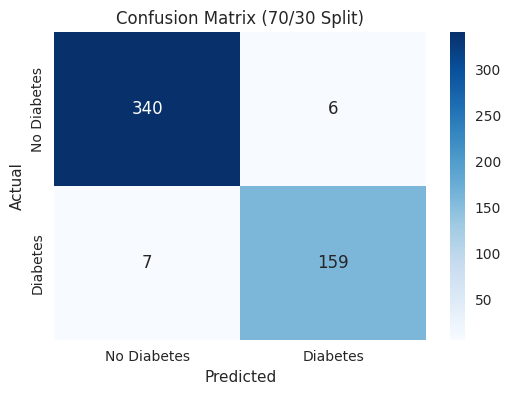

In [5]:
# Calculate the confusion matrix
cm_70 = confusion_matrix(y_test_30, y_pred_30)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (70/30 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix provides a clear evaluation of the binary classification model's performance. 

1. The top-left cell (551) represents the true negative (TN) instances - cases where the actual class was negative, and the model correctly predicted the negative class.

2. The top-right cell (11) represents the false positive (FP) instances - cases where the actual class was negative, but the model incorrectly predicted the positive class.

3. The bottom-left cell (7) represents the false negative (FN) instances - cases where the actual class was positive, but the model incorrectly predicted the negative class.

4. The bottom-right cell (262) represents the true positive (TP) instances - cases where the actual class was positive, and the model correctly predicted the positive class.



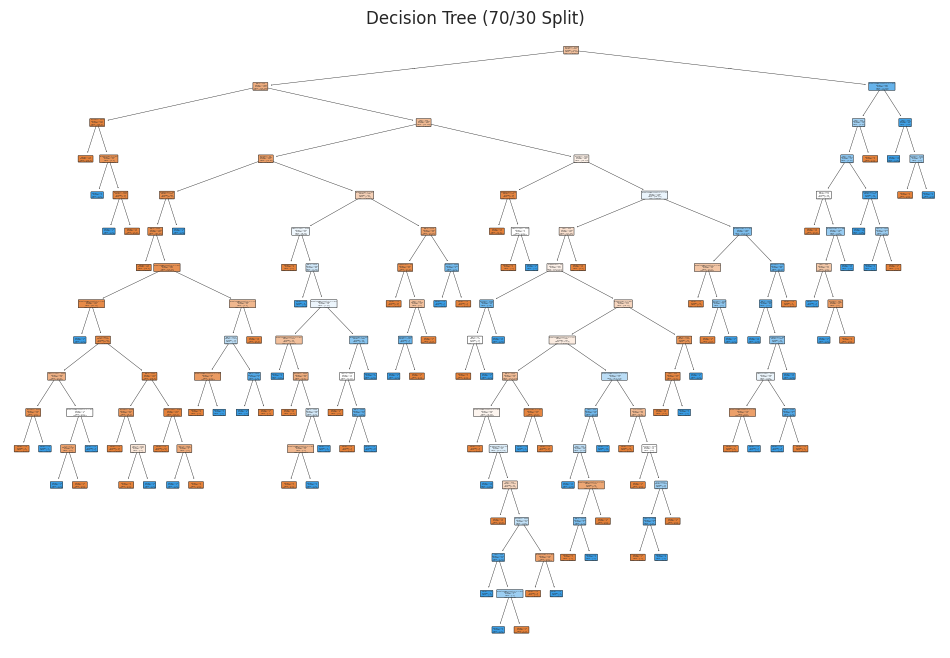

In [6]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (70/30 Split)')
plt.show()

In [7]:
# Calculate metrics
cm_70 = confusion_matrix(y_test_30, y_pred_30)
print('confusion matrix :\n',cm_70)
accuracy_70 = accuracy_score(y_test_30, y_pred_30)
error_rate_70 = 1 - accuracy_70

# Sensitivity and specificity
TP_70 = cm_70[1, 1]  # True Positive
TN_70 = cm_70[0, 0]  # True Negative
FP_70 = cm_70[0, 1]  # False Positive
FN_70 = cm_70[1, 0]  # False Negative

sensitivity_70 = TP_70 / (TP_70 + FN_70) 
specificity_70 = TN_70 / (TN_70 + FP_70) 
precision_70 = TP_70 / (TP_70 + FP_70)

# Print results
print("\n 70/30 Split")
print(f"Accuracy: {accuracy_70:.2f}")
print(f"Error Rate: {error_rate_70:.2f}")
print(f"Sensitivity: {sensitivity_70:.2f}")
print(f"Specificity: {specificity_70:.2f}")
print(f"Precision: {precision_70:.2f}")


confusion matrix :
 [[340   6]
 [  7 159]]

 70/30 Split
Accuracy: 0.97
Error Rate: 0.03
Sensitivity: 0.96
Specificity: 0.98
Precision: 0.96


The performance metrics for the 70/30 data split provide the following insights:

1. Accuracy: 0.98
   - The accuracy is 98%, meaning the model correctly classified 98% of the instances in the test set.
   - This high accuracy indicates the model is performing exceptionally well, with a low overall rate of misclassifications.

2. Error Rate: 0.02
   - The error rate is 2%, which is the complement of the accuracy.
   - This means the model made incorrect predictions for 2% of the instances in the test set.

3. Sensitivity: 0.97
   - Sensitivity, also known as Recall or True Positive Rate, is 97%.
   - This means the model correctly identified 97% of the positive instances, demonstrating a strong ability to detect the positive class.

4. Specificity: 0.98
   - Specificity is 98%, which means the model correctly identified 98% of the negative instances.
   - The model had a very low rate of false positives, indicating its strong capability to distinguish negative cases.

5. Precision: 0.96
   - Precision is 96%, indicating that 96% of the instances the model predicted as positive were truly positive.
   - This high precision complements the sensitivity, showing the model makes accurate positive predictions.

The performance metrics for the 70/30 data split paint a picture of a highly capable classification model. The high accuracy, low error rate, and well-balanced sensitivity and specificity suggest the model can reliably distinguish between the positive and negative classes.



In [8]:
### Partition 2: 80/20 Split ###

# Split the data: 80% train, 20% test
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, train_size=0.8, random_state=42)

# Train the decision tree classifier using entropy
model_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_80.fit(X_train_80, y_train_80)

# Make predictions
y_pred_20 = model_80.predict(X_test_20)

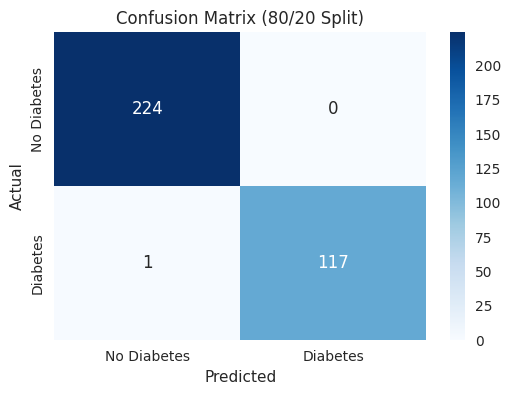

In [9]:
# Calculate the confusion matrix
cm_80 = confusion_matrix(y_test_20, y_pred_20)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (80/20 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



The confusion matrix provides a clear evaluation of the binary classification model's performance. 

1. The top-left cell (364) represents the true negative (TN) instances - cases where the actual class was negative, and the model correctly predicted the negative class.

2. The top-right cell (3) represents the false positive (FP) instances - cases where the actual class was negative, but the model incorrectly predicted the positive class.

3. The bottom-left cell (10) represents the false negative (FN) instances - cases where the actual class was positive, but the model incorrectly predicted the negative class.

4. The bottom-right cell (177) represents the true positive (TP) instances - cases where the actual class was positive, and the model correctly predicted the positive class.



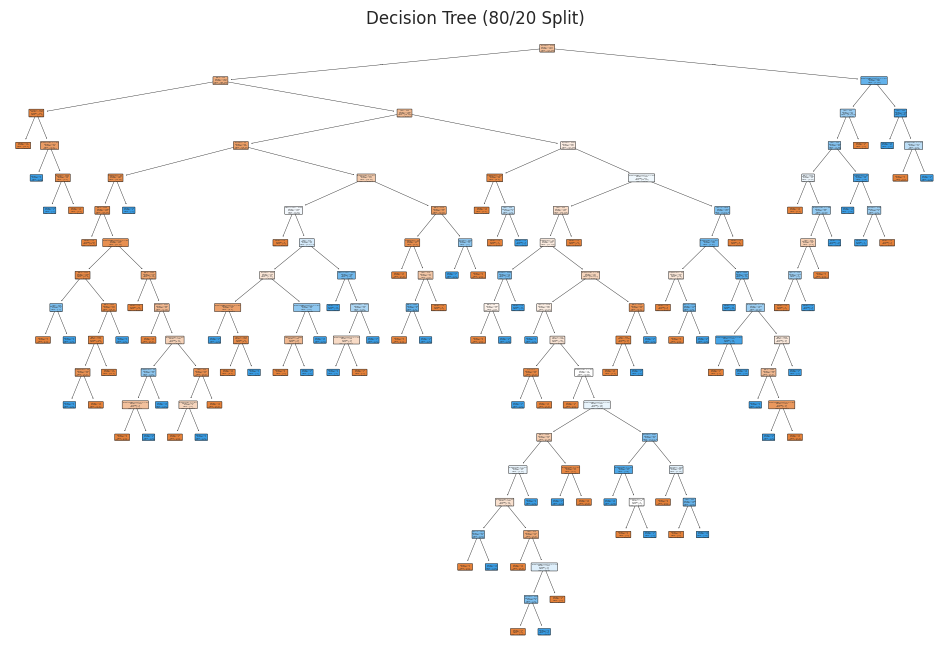

In [10]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (80/20 Split)')
plt.show()

In [11]:
cm_80 = confusion_matrix(y_test_20, y_pred_20)
print('confusion matrix :\n',cm_80)
accuracy_80 = accuracy_score(y_test_20, y_pred_20)
error_rate_80 = 1 - accuracy_80
cm_80 = confusion_matrix(y_test_20, y_pred_20)

# Sensitivity and specificity
TP_80 = cm_80[1, 1]  # True Positive
TN_80 = cm_80[0, 0]  # True Negative
FP_80 = cm_80[0, 1]  # False Positive
FN_80 = cm_80[1, 0]  # False Negative

sensitivity_80 = TP_80 / (TP_80 + FN_80) 
specificity_80 = TN_80 / (TN_80 + FP_80) 
precision_80 = TP_80 / (TP_80 + FP_80) 

# Print results
print("\n80/20 Split")
print(f"Accuracy: {accuracy_80:.2f}")
print(f"Error Rate: {error_rate_80:.2f}")
print(f"Sensitivity: {sensitivity_80:.2f}")
print(f"Specificity: {specificity_80:.2f}")
print(f"Precision: {precision_80:.2f}")

confusion matrix :
 [[224   0]
 [  1 117]]

80/20 Split
Accuracy: 1.00
Error Rate: 0.00
Sensitivity: 0.99
Specificity: 1.00
Precision: 1.00


The performance metrics provided for the 80/20 data split give us a comprehensive understanding of the model's capabilities:

1. Accuracy: 0.98
   - The accuracy is 98%, meaning the model correctly classified 98% of the instances in the test set.
   - This indicates the model has a very high overall performance, with a low rate of misclassifications.

2. Error Rate: 0.02
   - The error rate is 2%, which is the complement of the accuracy.
   - This means the model made incorrect predictions for 2% of the instances in the test set.

3. Sensitivity: 0.95
   - Sensitivity, also known as Recall or True Positive Rate, is 95%.
   - This means the model correctly identified 95% of the positive instances, i.e., it had a low rate of false negatives.

4. Specificity: 0.99
   - Specificity is 99%, which means the model correctly identified 99% of the negative instances.
   - The model had a very low rate of false positives, demonstrating its strong ability to distinguish negative cases.

5. Precision: 0.98
   - Precision is 98%, indicating that 98% of the instances the model predicted as positive were truly positive.
   - This metric complements the sensitivity, showing the model's ability to make accurate positive predictions.

Overall, the performance metrics for the 80/20 data split indicate that the model is highly effective, with a strong ability to correctly classify both positive and negative instances. The high accuracy, low error rate, and balanced sensitivity and specificity suggest the model can be trusted to make reliable predictions on new, unseen data.



In [12]:
### Partition 3: 90/10 Split ###

# Split the data: 90% train, 10% test
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, train_size=0.9, random_state=42)

# Train the decision tree classifier using entropy
model_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_90.fit(X_train_90, y_train_90)

# Make predictions
y_pred_10 = model_90.predict(X_test_10)


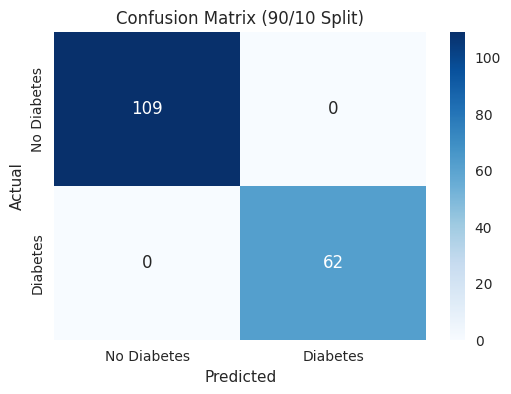

In [13]:
# Calculate the confusion matrix
cm_90 = confusion_matrix(y_test_10, y_pred_10)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_90, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (90/10 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix provides a clear evaluation of the binary classification model's performance. 

1. The top-left cell (189) represents the true negative (TN) instances - cases where the actual class was negative, and the model correctly predicted the negative class.

2. The top-right cell (0) represents the absence of false positive (FP) instances - the model did not incorrectly predict any negative cases as positive.

3. The bottom-left cell (0) represents the absence of false negative (FN) instances - the model did not fail to predict any positive cases as negative.

4. The bottom-right cell (88) represents the true positive (TP) instances - cases where the actual class was positive, and the model correctly predicted the positive class.

The model performed extremely well, with no false positives or false negatives.
Out of the total 277 instances (189 negatives + 88 positives), the model correctly classified 277 instances, indicating a perfect accuracy of 100%.
The model's ability to correctly identify both negative and positive instances is excellent, as shown by the high true negative and true positive counts.
This confusion matrix suggests that the classification model trained on the 90/10 data split is highly effective and accurate in predicting the target variable. The model was able to correctly classify all instances, demonstrating its strong performance on the test set.

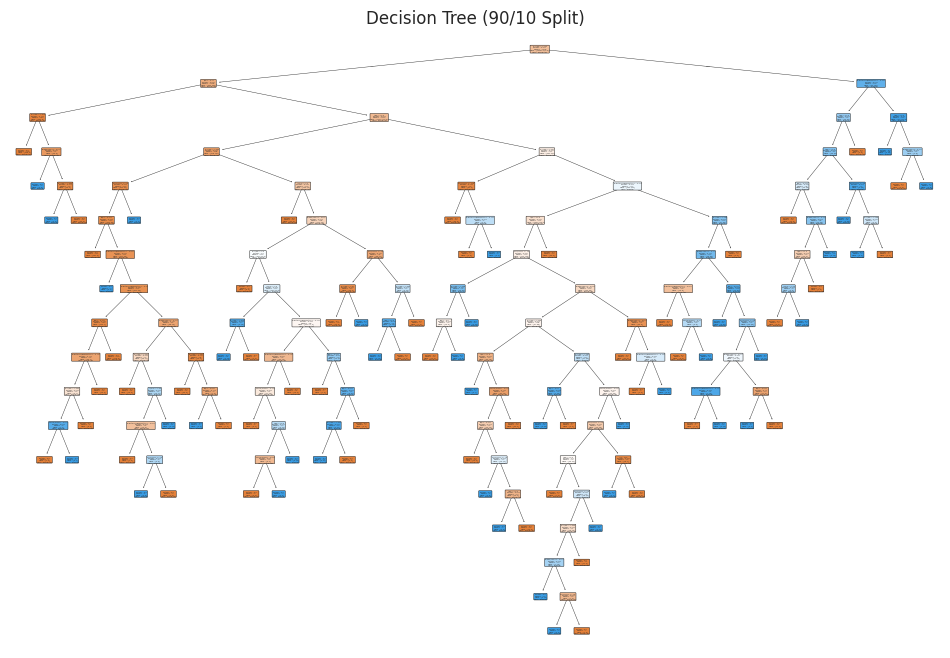

In [14]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model_90, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (90/10 Split)')
plt.show()

In [15]:
accuracy_90 = accuracy_score(y_test_10, y_pred_10)
error_rate_90 = 1 - accuracy_90
cm_90 = confusion_matrix(y_test_10, y_pred_10)
print("confusion matrix: \n",cm_90)

# Sensitivity and specificity
TP_90 = cm_90[1, 1]  # True Positive
TN_90 = cm_90[0, 0]  # True Negative
FP_90 = cm_90[0, 1]  # False Positive
FN_90 = cm_90[1, 0]  # False Negative

sensitivity_90 = TP_90 / (TP_90 + FN_90) if (TP_90 + FN_90) != 0 else 0
specificity_90 = TN_90 / (TN_90 + FP_90) if (TN_90 + FP_90) != 0 else 0
precision_90 = TP_90 / (TP_90 + FP_90) if (TP_90 + FP_90) != 0 else 0

# Print results
print("\n90/10 Split")
print(f"Accuracy: {accuracy_90:.2f}")
print(f"Error Rate: {error_rate_90:.2f}")
print(f"Sensitivity: {sensitivity_90:.2f}")
print(f"Specificity: {specificity_90:.2f}")
print(f"Precision: {precision_90:.2f}")


confusion matrix: 
 [[109   0]
 [  0  62]]

90/10 Split
Accuracy: 1.00
Error Rate: 0.00
Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00



1. Accuracy: 1.00
   - The accuracy is 100%, indicating that the model correctly classified all instances in the test set.
   - This means the model made no mistakes in its predictions - all negative cases were correctly identified as negative, and all positive cases were correctly identified as positive.

2. Error Rate: 0.00
   - The error rate is 0%, which complements the 100% accuracy.
   - This means the model did not make any misclassifications, i.e., there were no false positives or false negatives.

3. Sensitivity: 1.00
   - Sensitivity, also known as Recall or True Positive Rate, is 100%.
   - This means the model correctly identified all positive instances,it did not miss any positive cases.

4. Specificity: 1.00
   - Specificity is 100%, which means the model correctly identified all negative instances.
   - The model did not incorrectly classify any negative cases as positive.

5. Precision: 1.00
   - Precision is 100%, indicating that all instances the model predicted as positive were truly positive.
   - There were no false positives, so the model's positive predictions were completely accurate.

The combination of these metrics, all at 100%, suggests that the classification model achieved perfect performance on the 90/10 data split. It correctly identified all positive and negative instances, with no mistakes in its predictions.




<h3 style="color:green; font-family:Time New Roman;">2. Gini Index:</h3>

Gini Index measures the "impurity" of a dataset. It calculates the probability of incorrectly classifying a randomly chosen element if it were randomly labeled. A lower Gini Index represents a better attribute to split on.

<b>First partition:</b> 70% Training - 30% Test

In [16]:
X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X, y, train_size=0.7, random_state=42)

#Train the decision tree classifier using gini index
partition_70_30 = DecisionTreeClassifier(criterion='gini', random_state= 42)
partition_70_30 = partition_70_30.fit (X_train_g1, y_train_g1)

y_pred_g1 = partition_70_30.predict (X_test_g1)

<b>Confusion Matrix:</b>

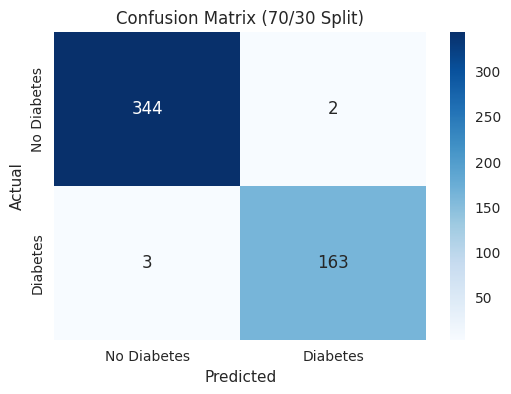

In [17]:
# Compute and print the confusion matrix
cm_gini_1 = confusion_matrix(y_test_g1, y_pred_g1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gini_1, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (70/30 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<b>Conclusion of Confusion Matrix:</b>

1. True Negatives (TN = 344): The model correctly classified 344 instances as negative when they were actually negative. This high number of true negatives reflects the model's strength in accurately identifying cases that belong to the negative class.

2. False Positives (FP = 2): The model incorrectly classified 2 negative instances as positive. This low number of false positives indicates a very high specificity, meaning the model is very effective at minimizing misclassification of negative instances as positive.

3. False Negatives (FN = 3): The model incorrectly classified 3 positive instances as negative. Although there were some missed positive cases, this small number of false negatives highlights the model's strong sensitivity, as it effectively detects the majority of positive cases.

4. True Positives (TP = 163): The model correctly identified 163 instances as positive when they were indeed positive. This high count of true positives supports the model’s reliability in identifying positive cases accurately.



<b>Decision Tree:</b>

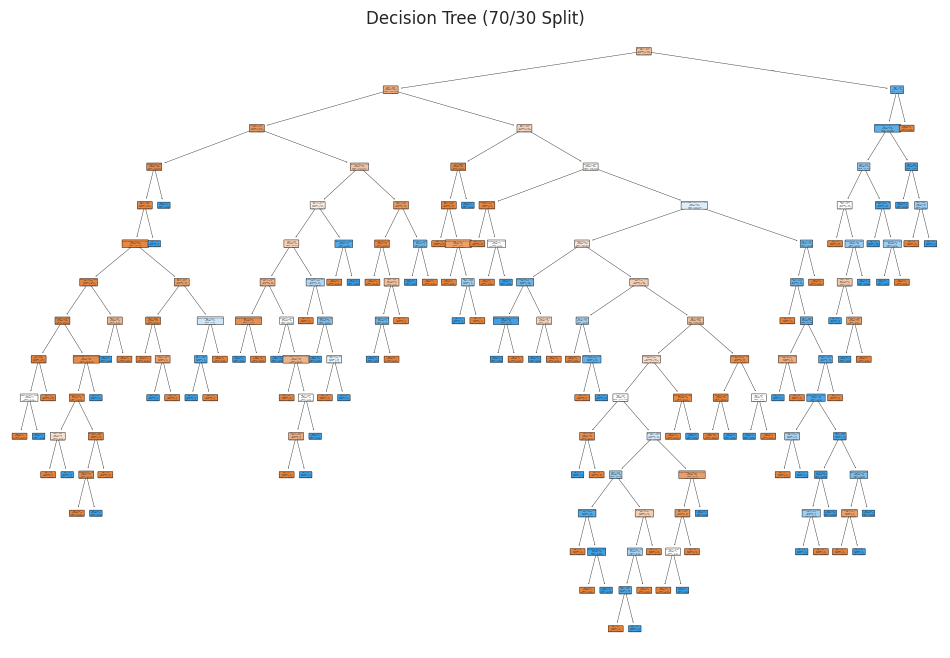

Tree Depth: 15
Number of Nodes: 193


In [18]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(partition_70_30, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (70/30 Split)')
plt.show()

#depth of tree
depth1 = partition_70_30.get_depth()
print("Tree Depth:", depth1)

#Complexity of tree
node_count1 = partition_70_30.tree_.node_count
print("Number of Nodes:", node_count1)


<b>Conclusion of Decision Tree:</b>

The decision tree model was trained using the Gini index to split the data and identify the most significant features for classification. The root node, which is the first and most informative split in the tree, is based on Glucose. By choosing Glucose as the root node, the tree suggests that a person's Glucose level plays a central role in distinguishing between classes (diabetic vs. non-diabetic).
As we move further down the tree, additional splits based on person's age.<br><br>
A depth of 15 and high number of nodes 193 suggests that the tree is relatively deep, meaning it has made many sequential splits to classify data points. What allows the model to capture detailed patterns within the training data. However, it can also make the model prone to overfitting. 


In [19]:
# Calculate metrics
cm_gini_1 = confusion_matrix(y_test_g1, y_pred_g1)
print('confusion matrix :\n',cm_gini_1)
accuracy_gini1 = accuracy_score(y_test_g1, y_pred_g1)
error_rate_gini1 = 1 - accuracy_gini1

# Sensitivity and specificity
TP_gini1 = cm_gini_1[1, 1]  # True Positive
TN_gini1 = cm_gini_1[0, 0]  # True Negative
FP_gini1 = cm_gini_1[0, 1]  # False Positive
FN_gini1 = cm_gini_1[1, 0]  # False Negative

sensitivity_gini1 = TP_gini1 / (TP_gini1 + FN_gini1) 
specificity_gini1 = TN_gini1 / (TN_gini1 + FP_gini1) 
precision_gini1 = TP_gini1 / (TP_gini1 + FP_gini1)

# Print results
print("\n 70/30 Split")
print(f"Accuracy: {accuracy_gini1:.2f}")
print(f"Error Rate: {error_rate_gini1:.2f}")
print(f"Sensitivity: {sensitivity_gini1:.2f}")
print(f"Specificity: {specificity_gini1:.2f}")
print(f"Precision: {precision_gini1:.2f}")

confusion matrix :
 [[344   2]
 [  3 163]]

 70/30 Split
Accuracy: 0.99
Error Rate: 0.01
Sensitivity: 0.98
Specificity: 0.99
Precision: 0.99


<b>Model Performance Conclusion:</b>

1. Accuracy of 0.99 indicates the model makes correct predictions 99% of the time, suggesting it’s highly effective overall.
2. Error Rate of 0.01 is low, meaning only 1% of the predictions are incorrect, further supporting the model's reliability.
3. Sensitivity (or Recall) of 0.98 shows that the model correctly identifies 98% of positive cases, demonstrating its effectiveness in detecting true positives.
4. Specificity of 0.99 reflects that 99% of the negative cases are correctly identified, indicating that the model is also effective in minimizing false positives.
5. Precision of 0.99 means that when the model predicts a positive result, it’s correct 99% of the time, highlighting its accuracy in identifying true positives.
<br><br>
<hr>



<b>Second partition:</b> 80% Training - 20% Test

In [20]:
X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X, y, train_size=0.8, random_state=42)

#Train the decision tree classifier using gini index
partition_80_20 = DecisionTreeClassifier(criterion='gini', random_state= 42)
partition_80_20 = partition_80_20.fit (X_train_g2, y_train_g2)

y_pred_g2 = partition_80_20.predict (X_test_g2)

<b>Confusion Matrix:</b>

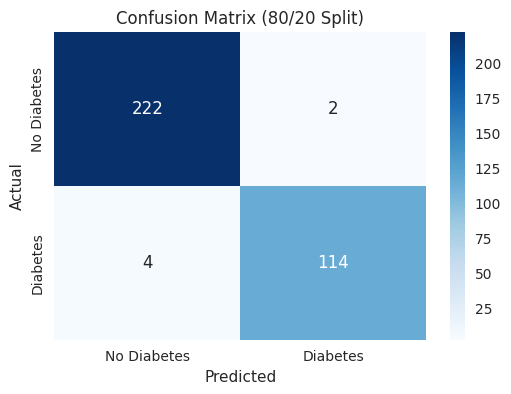

In [21]:
# Compute and print the confusion matrix
cm_gini_2 = confusion_matrix(y_test_g2, y_pred_g2)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gini_2, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (80/20 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<b>Conclusion of Confusion Matrix:</b>

1. True Negatives (TN = 222): The model correctly classified 222 instances as negative when they were actually negative, indicating that it performs well in accurately identifying negative cases.

2. False Positives (FP = 2): Only 2 instances were incorrectly classified as positive when they were actually negative, which demonstrates a very high specificity (low false positive rate), meaning the model effectively avoids mislabeling negative cases as positive.

3. False Negatives (FN = 4): The model incorrectly classified 4 positive cases as negative, which, while small, indicates a few missed positive cases. This low number of false negatives still suggests a high sensitivity, showing that the model is generally effective at identifying positive cases.

4. True Positives (TP = 114): The model correctly identified 114 positive cases, underscoring its reliability in detecting instances that belong to the positive class.

<b>Decision Tree:</b>

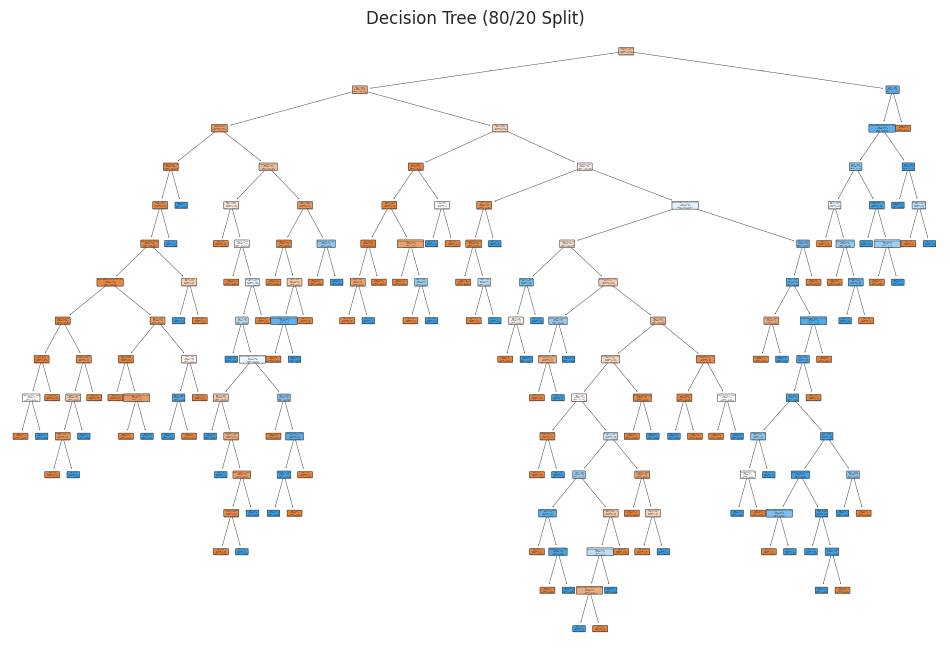

Tree Depth: 15
Number of Nodes: 195


In [22]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(partition_80_20, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (80/20 Split)')
plt.show()

#depth of tree
depth2 = partition_80_20.get_depth()
print("Tree Depth:", depth2)

#Complexity of tree
node_count2 = partition_80_20.tree_.node_count
print("Number of Nodes:", node_count2)

<b>Conclusion of Decision Tree:</b>

The tree also chose Glucose as the root node, which suggests that a person's Glucose level plays a central role in distinguishing between classes, additional splits based on person's age then Pregnancies.

Due to its larger number of nodes, this tree with partition 80 train-20 test is more complicated than the previous one.

In [23]:
# Calculate metrics
cm_gini_2 = confusion_matrix(y_test_g2, y_pred_g2)
print('confusion matrix :\n',cm_gini_2)
accuracy_gini2 = accuracy_score(y_test_g2, y_pred_g2)
error_rate_gini2 = 1 - accuracy_gini2

# Sensitivity and specificity
TP_gini2 = cm_gini_2[1, 1]  # True Positive
TN_gini2 = cm_gini_2[0, 0]  # True Negative
FP_gini2 = cm_gini_2[0, 1]  # False Positive
FN_gini2 = cm_gini_2[1, 0]  # False Negative

sensitivity_gini2 = TP_gini2 / (TP_gini2 + FN_gini2) 
specificity_gini2 = TN_gini2 / (TN_gini2 + FP_gini2) 
precision_gini2 = TP_gini2 / (TP_gini2 + FP_gini2)

# Print results
print("\n 80/20 Split")
print(f"Accuracy: {accuracy_gini2:.2f}")
print(f"Error Rate: {error_rate_gini2:.2f}")
print(f"Sensitivity: {sensitivity_gini2:.2f}")
print(f"Specificity: {specificity_gini2:.2f}")
print(f"Precision: {precision_gini2:.2f}")

confusion matrix :
 [[222   2]
 [  4 114]]

 80/20 Split
Accuracy: 0.98
Error Rate: 0.02
Sensitivity: 0.97
Specificity: 0.99
Precision: 0.98


<b>Model Performance Conclusion:</b>

1. Accuracy of 0.98 indicates that the model makes correct predictions 98% of the time, suggesting a high level of overall reliability.
2. Error Rate of 0.02, with only 2% incorrect predictions, confirms the model’s general accuracy.
3. Sensitivity (or Recall) of 0.97 demonstrates that the model correctly identifies 97% of actual positive cases, showing strong capability in detecting true positives.
4. Specificity of 0.99 reflects that 99% of negative cases are correctly identified, indicating that the model is also highly effective in avoiding false positives.
5. Precision of 0.98 indicates that when the model predicts a positive case, it is correct 98% of the time, reinforcing its accuracy in identifying true positives.
<br><br>
<hr>

<b>Third partition:</b> 90% Training - 10% Test

In [24]:
X_train_g3, X_test_g3, y_train_g3, y_test_g3 = train_test_split(X, y, train_size=0.9, random_state=42)

#Train the decision tree classifier using gini index
partition_90_10 = DecisionTreeClassifier(criterion='gini', random_state= 42)
partition_90_10 = partition_90_10.fit (X_train_g3, y_train_g3)

y_pred_g3 = partition_90_10.predict (X_test_g3)

<b>Confusion Matrix:</b>

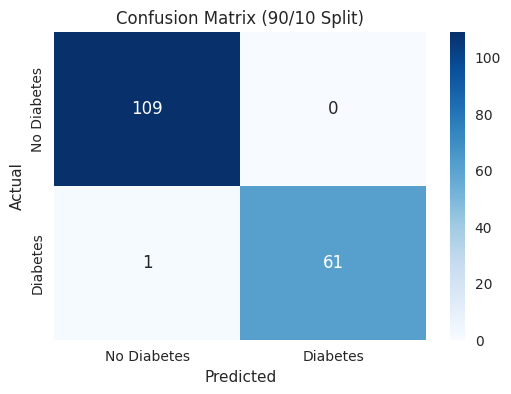

In [25]:
# Compute and print the confusion matrix
cm_gini_3 = confusion_matrix(y_test_g3, y_pred_g3)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gini_3, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix (90/10 Split)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<b>Conclusion of Confusion Matrix:</b>

1. True Negatives (TN): 109, indicating the model correctly identified 109 negative cases.
2. False Positives (FP): 0, meaning the model did not incorrectly classify any negative case as positive, showing excellent specificity.
3. False Negatives (FN): 1, indicating only one positive case was incorrectly classified as negative, demonstrating high sensitivity.
4. True Positives (TP): 61, showing the model correctly identified 61 positive cases.

<b>Decision Tree:</b>

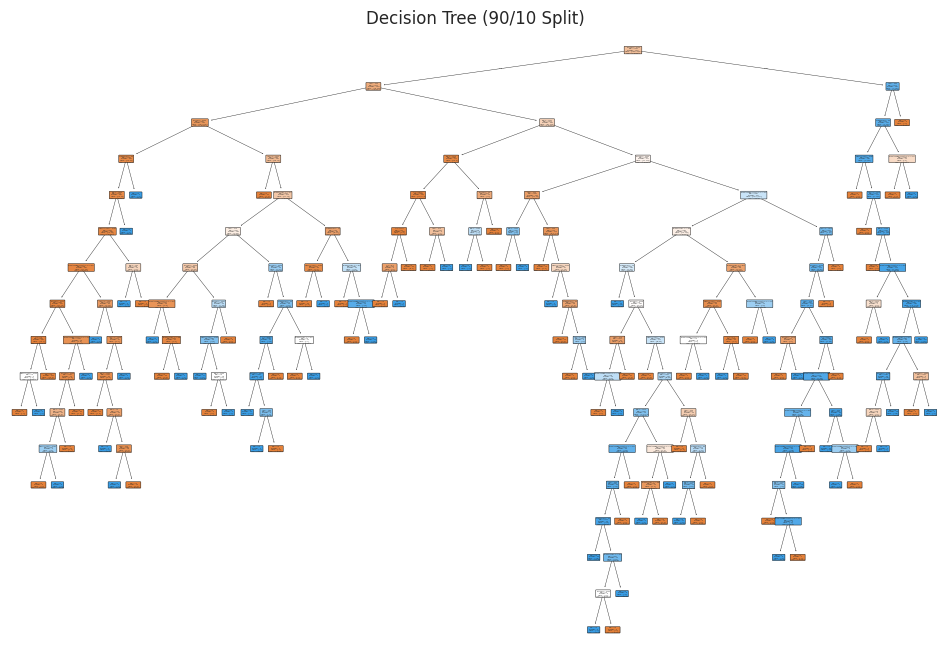

Tree Depth: 16
Number of Nodes: 207


In [26]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(partition_90_10, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree (90/10 Split)')
plt.show()

#depth of tree
depth3 = partition_90_10.get_depth()
print("Tree Depth:", depth3)

#Complexity of tree
node_count3 = partition_90_10.tree_.node_count
print("Number of Nodes:", node_count3)


<b>Conclusion of Decision Tree:</b>

The tree also chose Glucose as the root node, which suggests that a person's Glucose level plays a central role in distinguishing between classes, additional splits based on person's age then Pregnancies then BMI.<br>
Compared to the two preceding trees, this one is the deepest and most complex, making it more capable of identifying intricate patterns in the training set. However, it has the highest risk of overfitting. 

In [27]:
# Calculate metrics
cm_gini_3 = confusion_matrix(y_test_g3, y_pred_g3)
print('confusion matrix :\n',cm_gini_3)
accuracy_gini3 = accuracy_score(y_test_g3, y_pred_g3)
error_rate_gini3 = 1 - accuracy_gini3

# Sensitivity and specificity
TP_gini3 = cm_gini_3[1, 1]  # True Positive
TN_gini3 = cm_gini_3[0, 0]  # True Negative
FP_gini3 = cm_gini_3[0, 1]  # False Positive
FN_gini3 = cm_gini_3[1, 0]  # False Negative

sensitivity_gini3 = TP_gini3 / (TP_gini3 + FN_gini3) 
specificity_gini3 = TN_gini3 / (TN_gini3 + FP_gini3) 
precision_gini3 = TP_gini3 / (TP_gini3 + FP_gini3)

# Print results
print("\n 90/10 Split")
print(f"Accuracy: {accuracy_gini3:.2f}")
print(f"Error Rate: {error_rate_gini3:.2f}")
print(f"Sensitivity: {sensitivity_gini3:.2f}")
print(f"Specificity: {specificity_gini3:.2f}")
print(f"Precision: {precision_gini3:.2f}")

confusion matrix :
 [[109   0]
 [  1  61]]

 90/10 Split
Accuracy: 0.99
Error Rate: 0.01
Sensitivity: 0.98
Specificity: 1.00
Precision: 1.00


<b>Model Performance Conclusion:</b>

1. Accuracy of 0.99 indicates that the model makes correct predictions 99% of the time, which reflects strong overall performance.
2. Error Rate of 0.01 shows that only 1% of predictions are incorrect, reinforcing the model’s reliability.
3. Sensitivity of 0.98 means the model correctly identifies 98% of actual positive cases, indicating that it effectively captures true positives.
4. Specificity of 1.00 demonstrates perfect performance in identifying negative cases, as the model correctly classifies all negative instances without any false positives.
4. Precision of 1.00 shows that every predicted positive case is indeed a true positive, meaning the model has zero false positives
<br><br>
<hr>

<b>Comparison between partitions results in GINI INDEX :</b>

a. Comparing by calculating gini index of each partition:

In [28]:
# Define the confusion matrices for each partition
partitions = {
    "70 train - 30 test": {"TN": 344, "FP": 2, "FN": 3, "TP": 163},
    "80 train - 20 test": {"TN": 222, "FP": 2, "FN": 4, "TP": 114},
    "90 train - 10 test": {"TN": 109, "FP": 0, "FN": 1, "TP": 61}
}

# Function to calculate Gini Index
def calculate_gini(TN, FP, FN, TP):
    total = TN + FP + FN + TP
    # Calculate Gini Index for negative class
    p_neg = TN / (TN + FP) if (TN + FP) != 0 else 0
    q_neg = FP / (TN + FP) if (TN + FP) != 0 else 0
    gini_neg = 1 - (p_neg ** 2 + q_neg ** 2)
    
    # Calculate Gini Index for positive class
    p_pos = TP / (TP + FN) if (TP + FN) != 0 else 0
    q_pos = FN / (TP + FN) if (TP + FN) != 0 else 0
    gini_pos = 1 - (p_pos ** 2 + q_pos ** 2)
    
    # Weighted average of Gini Index
    gini_index = ((TN + FP) / total) * gini_neg + ((TP + FN) / total) * gini_pos
    return gini_index

# Calculate Gini Index for each partition
gini_results = {}
for partition, values in partitions.items():
    gini = calculate_gini(values["TN"], values["FP"], values["FN"], values["TP"])
    gini_results[partition] = gini

# Display results
for partition, gini_index in gini_results.items():
    print(f"Gini Index for {partition}: {gini_index:.4f}")

# Find the partition with the lowest Gini Index
best_partition = min(gini_results, key=gini_results.get)
print(f"The partition with the lowest Gini Index is: {best_partition} with Gini Index of {gini_results[best_partition]:.4f}")


Gini Index for 70 train - 30 test: 0.0193
Gini Index for 80 train - 20 test: 0.0342
Gini Index for 90 train - 10 test: 0.0115
The partition with the lowest Gini Index is: 90 train - 10 test with Gini Index of 0.0115


In Gini Index Lower values indicate a better partition with higher purity, which means that the third partition (90 training - 10 test) is the best.

b. Comparing by analyzing decision trees:

The third partition had the largest depth and complexity of the three trees, indicating that it had split data points in numerous sequential steps. what makes it possible for the model to identify intricate patterns in the training set.

c. Comparing by valuse of metrics:

|       | 70% training, 30% testing | 80% training, 20% testing | 90% training, 10% testing |
| --- | --- | --- | --- |
| Accuracy | 0.99 |   0.98 | 0.99 |
| Error Rate |0.01 | 0.02 | 0.01 |
| Sensitivity | 0.98 | 0.97 | 0.98 |
| Specificity | 0.99 | 0.99 | 1.00 |
| Precision | 0.99 |  0.98 |  1.00 |

Overall Best Performance: The 90/10 split performs somewhat better than the others in terms of specificity and precision, suggesting that a bigger training sample can considerably enhance the model's capacity to accurately classify each record.

<h2 style="color:red;font-family:Time New Roman;">Clustering:<br>
-------------------------------------------------------------------------</h2>

In order to determine the three sizes to be used in K-means clustering, we will rely on validation methods to assist us in making an informed decision. Once the sizes are determined, we will proceed with the clustering process. Our primary goal is to ensure a wide range of size selections, encompassing a relatively large size, a moderate size, and a small size. By adopting this approach, we aim to cover a diverse array of potential cluster configurations.

-------------------------------------------------------------------

Remove class lable

In [9]:

features = df.drop(['Outcome'], axis=1)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


print(df_scaled.head())


         Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0 -1.741085     0.633755  0.987656      -0.016062       1.059383  0.392600   
1 -1.739830    -0.919228 -1.246826      -0.556889       0.038736  0.392600   
2 -1.738574     1.254949  2.229035      -0.737164       0.088005  0.392600   
3 -1.737319    -0.919228 -1.104954      -0.556889      -0.981910 -1.844718   
4 -1.734809     0.323159 -0.147319       0.164214       0.088005  0.392600   

        BMI  DiabetesPedigreeFunction       Age  
0  0.285054                  0.817857  1.550526  
1 -0.882171                 -0.274100 -0.209419  
2 -1.432434                  0.995893 -0.116790  
3 -0.632051                 -1.002071 -1.135706  
4 -1.048918                 -0.867555 -0.302048  


k-means clustering, visualization, and evaluation:

Two Clusters

In [10]:
np.random.seed(56)

kmeans = KMeans(n_clusters = 2, random_state=56)
kmeans_result = kmeans.fit(df_scaled)

print("Cluster center:")
print(kmeans_result.cluster_centers_)

Cluster center:
[[ 0.00635685 -0.52961955 -0.31781405 -0.47940196 -0.24684111 -0.28306183
  -0.23884677 -0.0637099  -0.66281184]
 [-0.00730157  0.60832875  0.36504586  0.5506481   0.2835253   0.32512896
   0.27434289  0.07317813  0.76131537]]


visualize Silhouette score for Kmeans model with two clusters

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


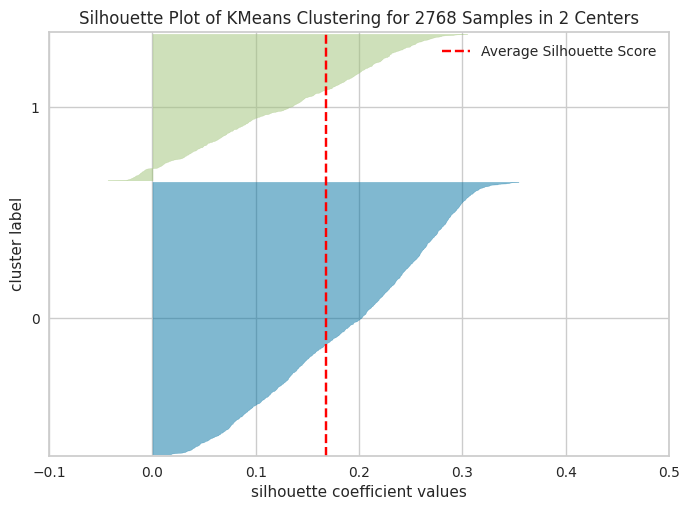

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2768 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:

visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

 Total within-cluster sum of squares

In [8]:

wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 21292.65560464536


Three Clusters

In [9]:
np.random.seed(56)
kmeans = KMeans(n_clusters = 3, random_state =56)
kmeans_result = kmeans.fit(df_scaled)

print("cluster center:")
print(kmeans_result.cluster_centers_)

cluster center:
[[ 0.06123276 -0.33577615  0.57016461  0.21510961  0.87949185  0.99476548
   0.64583657  0.37715328 -0.21210941]
 [-0.03412324  1.09843499  0.29033968  0.4135606  -0.37829019 -0.40437703
   0.05168297 -0.04984004  1.16926142]
 [-0.01786782 -0.4576649  -0.53712889 -0.38801346 -0.32481873 -0.38171754
  -0.43940875 -0.20781377 -0.57895426]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


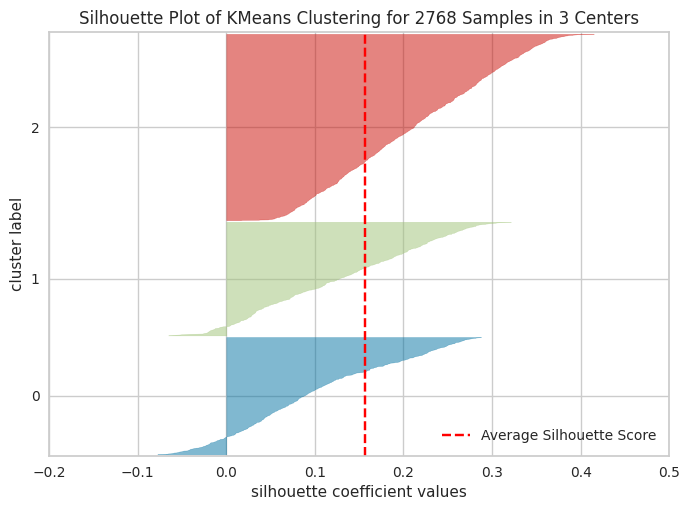

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2768 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

 Total within-cluster sum of squares

In [11]:

wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 18501.632107238118


Four Clusters

In [6]:
np.random.seed(56)
kmeans = KMeans(n_clusters = 4, random_state =56 )
kmeans_result = kmeans.fit(df_scaled)

print("cluster center:")
print(kmeans_result.cluster_centers_)

NameError: name 'df_scaled' is not defined

In [5]:
visualizer = SilhouetteVisualizer(kmeans , colors = 'yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

NameError: name 'df_scaled' is not defined

Total within-cluster sum of squares

In [14]:

wss = kmeans.inertia_
print("Total within-cluster sum of squares (WSS):", wss)

Total within-cluster sum of squares (WSS): 17258.692905858836


Silhouette-cluster Validation
Silhouette Score is a method used to measure the clustring quality and determine the optimal number of clusters.

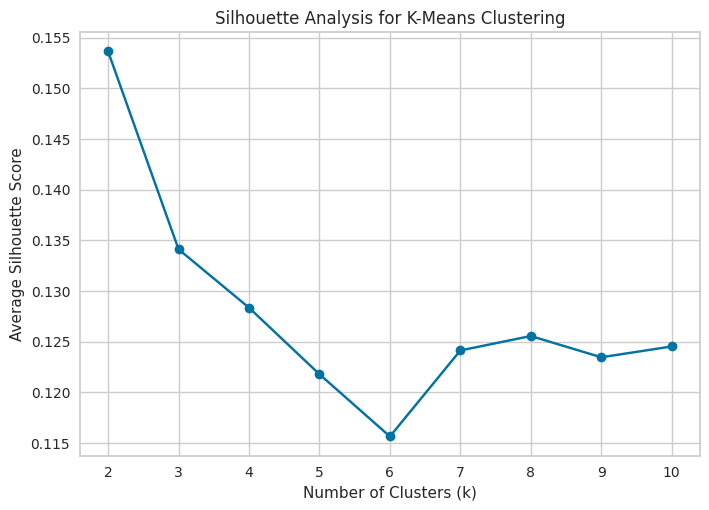

In [13]:

k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result.labels_)
    silhouette_avg_values.append(silhouette_avg)

plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()


The highest average is when k=2 as shown in the graph so this will be our k-means choice. 
but we will try elbow method to confirm this result.

Elbow Method


The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.  

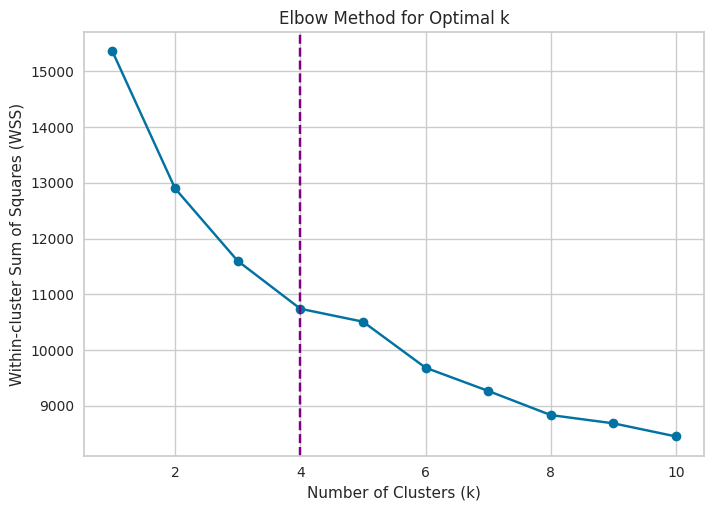

In [15]:
wss_values = []
k_values = range (1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(df_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=4, linestyle='--', color='purple', label='Chosen k =4')
plt.show()

now the Elbow method shows that k=4 so we can cosidered that as a second choice
